<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Titillium+Web:ital,wght@0,200;0,300;0,400;0,600;0,700;0,900;1,200;1,300;1,400;1,600;1,700&display=swap" rel="stylesheet">
<div class="box" style="padding: 10px; margin: 10px 0; background-color: gray; color: white; border-radius: 5px; font-size: 15px;">
  <table style="padding: 10px; margin: auto auto; background-color: gray;  border-radius: 5px; font-size: 15px;">
      <tr>
          <th colspan='2'><h1 style="text-align: center">
Machine Learning </br>
</h1>
<h2 style="text-align: center">
Course Assignment Two </br>
</h2>
</th>
<tr>
    <tr>
      <th colspan="2">Personal Info</th>
    </tr>
    <tr>
      <td>First Name:</td>
      <td>Ali</td>
    </tr>
    <tr>
      <td>Last Name:</td>
      <td>Nikkhah</td>
    </tr>
    <tr>
      <td>Student Number:</td>
      <td>99102445</td>
    </tr>
    <tr>
      <td>Github:</td>
      <td><a href="https://github.com/AliNikkhah2001/MachineLearning01" target="_blank">https://github.com/AliNikkhah2001/MachineLearning01</a></td>
    </tr>
  </table>
</div>



# ****Support Vector Machines****

In this notebook, you will implement SVM for three datasets. You will become more familiar with the Soft-Margin SVM and the Kernel trick, which makes SVM extremely powerful.

Before we start our implementation, you must be comfortable with the theoretical details of the Soft-Margin SVM as an optimization problem and be able to derive the dual formulation for this problem. In the next sections, you will solve the dual optimization problem for all datasets using the CVXPY library, which has been developed for solving convex optimization problems. To get more familiar with CVXPY programming, you can use this [link](https://www.cvxpy.org).

This is the primal formulation for the Soft-Margin SVM for linearly separable data with slack variables $\xi_i \ge 0$:

\begin{equation*}
\begin{aligned}
& {\text{min.}}
& & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.}
& & y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& & & \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
\end{equation*}

Where $w$ represents the weight vector, $b$ is the bias term, and $C$ is the regularization parameter controlling the trade-off between a wide margin and misclassification.

**Theoretical Questions:**

1) Derive the dual optimization problem for the Soft-Margin SVM.

2) How do we calculate the weights and bias ($w$ and $b$) using the dual problem optimum points?

3) How do we classify new data points using the optimal weights and bias?

### Derivation of the Dual Optimization Problem for the Soft-Margin SVM

To derive the dual optimization problem, we start with the primal formulation of the Soft-Margin SVM:

$$
\begin{aligned}
& \min_{w, b, \xi} \quad & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.} \quad & y_i (w^T x_i + b) \geq 1 - \xi_i, \quad i = 1, \ldots, N \\
& & \xi_i \geq 0, \quad i = 1, \ldots, N
\end{aligned}
$$

We introduce Lagrange multipliers \(\alpha_i \geq 0\) for the constraints \(y_i (w^T x_i + b) \geq 1 - \xi_i\) and \(\mu_i \geq 0\) for the constraints \(\xi_i \geq 0\). The Lagrangian function for the primal problem is:

$$
\begin{aligned}
L(w, b, \xi, \alpha, \mu) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i - \sum_{i=1}^{N} \alpha_i \left( y_i (w^T x_i + b) - 1 + \xi_i \right) - \sum_{i=1}^{N} \mu_i \xi_i
\end{aligned}
$$

Next, we take the partial derivatives of \(L\) with respect to \(w\), \(b\), and \(\xi_i\), and set them to zero to obtain the conditions for the dual problem:

$$
\begin{aligned}
\frac{\partial L}{\partial w} &= w - \sum_{i=1}^{N} \alpha_i y_i x_i = 0 \quad \Rightarrow \quad w = \sum_{i=1}^{N} \alpha_i y_i x_i \\
\frac{\partial L}{\partial b} &= -\sum_{i=1}^{N} \alpha_i y_i = 0 \quad \Rightarrow \quad \sum_{i=1}^{N} \alpha_i y_i = 0 \\
\frac{\partial L}{\partial \xi_i} &= C - \alpha_i - \mu_i = 0 \quad \Rightarrow \quad \alpha_i \leq C
\end{aligned}
$$

Substituting \(w = \sum_{i=1}^{N} \alpha_i y_i x_i\) into the Lagrangian, we get:

$$
\begin{aligned}
L(w, b, \xi, \alpha, \mu) &= \frac{1}{2} \left( \sum_{i=1}^{N} \alpha_i y_i x_i \right)^T \left( \sum_{i=1}^{N} \alpha_i y_i x_i \right) + C \sum_{i=1}^{N} \xi_i \\
& \quad - \sum_{i=1}^{N} \alpha_i \left( y_i \left( \sum_{j=1}^{N} \alpha_j y_j x_j^T \right) x_i + b \right) + \sum_{i=1}^{N} \alpha_i (1 - \xi_i) - \sum_{i=1}^{N} \mu_i \xi_i \\
&= \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j - \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j - b \sum_{i=1}^{N} \alpha_i y_i + \sum_{i=1}^{N} \alpha_i - C \sum_{i=1}^{N} \xi_i - \sum_{i=1}^{N} \mu_i \xi_i \\
&= -\frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j + \sum_{i=1}^{N} \alpha_i
\end{aligned}
$$

The dual problem is then to maximize the dual Lagrangian with respect to \(\alpha\):

$$
\begin{aligned}
& \max_{\alpha} \quad & \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j \\
& \text{s.t.} \quad & 0 \leq \alpha_i \leq C, \quad i = 1, \ldots, N \\
& & \sum_{i=1}^{N} \alpha_i y_i = 0
\end{aligned}
$$

### Calculation of Weights and Bias from Dual Problem

Once we have found the optimal \(\alpha_i\) from the dual problem, we can calculate the weights \(w\) and bias \(b\) as follows:

1. **Weights**: The weights \(w\) are computed using the support vectors and their corresponding \(\alpha_i\):

$$
w = \sum_{i=1}^{N} \alpha_i y_i x_i
$$

2. **Bias**: To calculate the bias \(b\), we use any support vector \(x_i\) for which \(0 < \alpha_i < C\):

$$
b = y_i - w^T x_i = y_i - \sum_{j=1}^{N} \alpha_j y_j x_j^T x_i
$$

### Classification of New Data Points

To classify a new data point \(x\), we use the sign of the decision function:

$$
f(x) = w^T x + b
$$

If \(f(x) \geq 0\), the data point is classified as \(+1\); otherwise, it is classified as \(-1\).

In summary:

1. Solve the dual optimization problem to find the optimal \(\alpha_i\).
2. Calculate the weights \(w\) and bias \(b\) using the support vectors.
3. Classify new data points using the decision function \(f(x) = w^T x + b\).

Sometimes, the data is not linearly separable. Therefore, the previous formulation of the Soft-Margin SVM does not give a good accuracy for the classification problem. The Kernel trick is a technique used in such situations. Consider $x$ as your input features with dimension $p$. One can use function $\phi: R^p → R^d$ to map the input features to another space with dimension $d$. Finding good $\phi$ such that data points become near linearly separable makes the previous formulation of the problem and its dual useful by replacing $\phi(x_i)$ for $x_i$ in the problem definition. The function $\phi(x)$ can even be a mapping to an infinite-dimensional space.

If you have found the correct dual form of the Soft-Margin SVM in the previous formulation, you can see that the terms $x_i^T x_j$ will appear in the problem formulation and the prediction rule. These terms will be replaced with $\phi(x_i)^T \phi(x_j)$ when we use $\phi$ as our feature mapping function. Given a feature mapping $\phi$ we define its corresponding **Kernel** to be:

\begin{equation*}
\begin{aligned}
& K(x, z) = \phi(x)^T \phi(z)
\end{aligned}
\end{equation*}

Hence, in the dual optimization problem and the prediction rule of the Soft-Margin SVM, we can replace all terms in the form $x^T z$ with $K(x, z)$. This technique is called the Kernel trick.

Now, given $\phi$, we could easily compute $K(x,z)$ by finding $\phi(x)$ and $\phi(z)$ and taking their inner product. But what’s more interesting is that often, $K(x,z)$ may be very inexpensive to calculate, even though $\phi(x)$ itself may be very expensive to calculate (perhaps because it is an extremely high-dimensional vector). Check Stanford's CS229 [notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf) on SVM and the Kernel trick for more details and examples.

## Libraries

Here are some useful libraries for the implementation. You can add or remove any libraries as you wish. Note that you cannot use sklearn or similar libraries for implementation.

In [76]:
!pip install cvxpy
!pip install cvxopt


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import cvxpy as cp
import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


## **Dataset Exploration**

In this notebook, you'll be working with three datasets, specifically named "DF1.csv", "DF2.csv", and "DF3.csv". Each dataset entry is composed of a 2-dimensional feature vector and a label, which is either "1" or "-1". The primary objective of this notebook is to leverage SVM to develop a robust classifier for each dataset.

You are given three kernels as follows:



1.   Linear Kernel: $K(x, z) = x^T z$
2.   Polynomial Kernel of degree 2: $K(x, z) = (1 + ∑_{i = 1}^{p} x_i z_i)^2$, where $p$ is the dimension of the feature space.
3.   RBF Kernel: $K(x, z) = e^{-\frac{||x-z||_2^2}{2σ^2}}$

Before implementing, you must choose the correct kernel for each dataset. Note that each kernel must be used exactly for one dataset. Therefore, you cannot use one of the kernels twice. As a part of our grading scheme, what matters with respect to accuracy is the sum of the accuracies you reach for all three datasets, and the accuracy of each model does not have any separate score. Thus, it would help if you chose the most appropriate kernel for each dataset so that all datasets reach a reasonably good accuracy.





Load all datasets and show the first 5 rows of each.

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load datasets
df1 = pd.read_csv("DF1.csv")
df2 = pd.read_csv("DF2.csv")
df3 = pd.read_csv("DF3.csv")

# Split datasets into features and labels
X1, y1 = df1.iloc[:, :-1], df1.iloc[:, -1]
X2, y2 = df2.iloc[:, :-1], df2.iloc[:, -1]
X3, y3 = df3.iloc[:, :-1], df3.iloc[:, -1]
print(X1,y1)
# Split into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)


            x1        x2
0     6.462652  5.121478
1    -6.586541 -7.721287
2     9.239683 -8.595738
3     4.250052  2.143755
4     8.219779 -3.609733
...        ...       ...
1471  8.750263  5.924727
1472  1.344747  6.829974
1473  1.791921  1.161046
1474  7.724187 -8.836980
1475 -4.628025  8.657593

[1476 rows x 2 columns] 0      -1
1       1
2      -1
3       1
4      -1
       ..
1471   -1
1472    1
1473   -1
1474   -1
1475    1
Name: y, Length: 1476, dtype: int64


Use the following function to visualize the datapoints for all datasets.

Visualizing DF1:


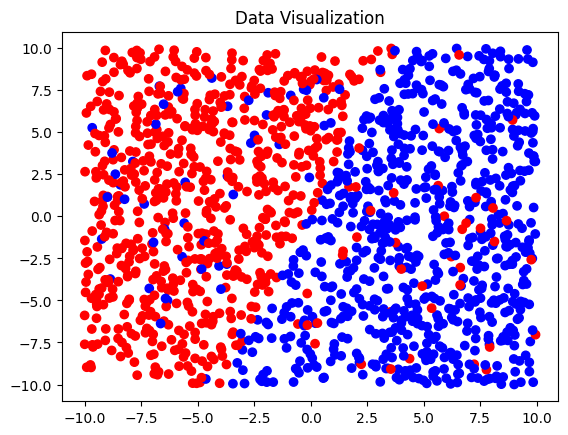

Visualizing DF2:


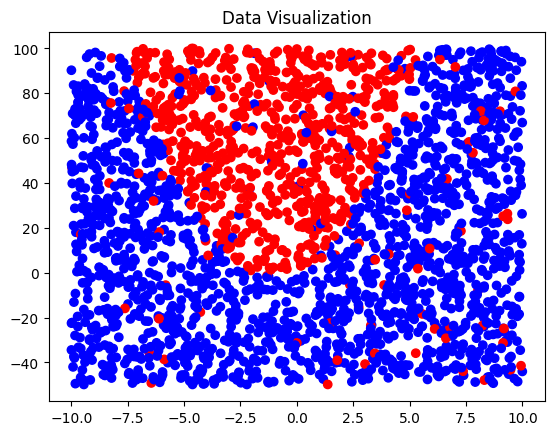

Visualizing DF3:


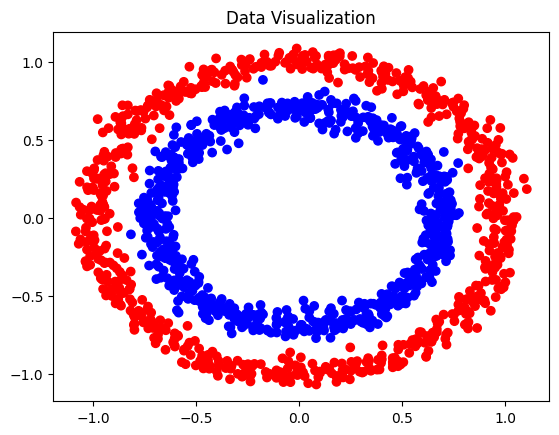

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

# Function to visualize data points
def visualize_data(X, y, title='Data Visualization'):
    col = ['red' if label == 1 else 'blue' for label in y]
    plt.scatter(X[:, 0], X[:, 1], color=col)
    plt.title(title)
    plt.show()
# Load datasets
df1 = pd.read_csv("DF1.csv")
df2 = pd.read_csv("DF2.csv")
df3 = pd.read_csv("DF3.csv")

# Split datasets into features and labels
X1, y1 = df1.iloc[:, :-1].values, df1.iloc[:, -1].values
X2, y2 = df2.iloc[:, :-1].values, df2.iloc[:, -1].values
X3, y3 = df3.iloc[:, :-1].values, df3.iloc[:, -1].values

# Visualize the data points for each dataset
print("Visualizing DF1:")
visualize_data(X1, y1)

print("Visualizing DF2:")
visualize_data(X2, y2)

print("Visualizing DF3:")
visualize_data(X3, y3)

**Theoretical Question:**

Which kernel will you use for each dataset? Justify your answer.

Note: your implementation must follow your choice here. Otherwise, you do not recieve any points for your implemetation.


### DF1
- **Observation**: The data in DF1 is linearly separable, as there is a clear straight line that can separate the red and blue points.
- **Kernel Choice**: **Linear Kernel**
  - **Justification**: Since the data is linearly separable, a linear kernel will be sufficient to separate the data points with a straight line. Using a more complex kernel would be unnecessary and could lead to overfitting.

### DF2
- **Observation**: The data in DF2 is not linearly separable, but there seems to be a polynomial pattern, possibly quadratic, separating the data points.
- **Kernel Choice**: **Polynomial Kernel (degree 2)**
  - **Justification**: The distribution of the points suggests a non-linear separation that could be captured well by a polynomial of degree 2. The polynomial kernel is suitable for data that is not linearly separable but can be separated with a polynomial decision boundary.

### DF3
- **Observation**: The data in DF3 forms concentric circles, which is a classic example of data that is not linearly separable and also not polynomially separable in the original feature space.
- **Kernel Choice**: **RBF Kernel**
  - **Justification**: The Radial Basis Function (RBF) kernel is well-suited for this kind of data structure, where the data points form circular or spherical clusters. The RBF kernel can map the data into a higher-dimensional space where it becomes linearly separable.

### Final Kernel Assignments
1. **DF1**: Linear Kernel
2. **DF2**: Polynomial Kernel (degree 2)
3. **DF3**: RBF Kernel

# Initial,preprocess

In [80]:
# Split datasets into features and labels
X1, y1 = df1.iloc[:, :-1].values, df1.iloc[:, -1].values
X2, y2 = df2.iloc[:, :-1].values, df2.iloc[:, -1].values
X3, y3 = df3.iloc[:, :-1].values, df3.iloc[:, -1].values

# Split into training and testing sets (80% train, 20% test)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)

### Example CVXPY usage

In [81]:
import cvxpy as cp
import numpy as np

# Problem data.
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)

[-1.78871195e-19  2.85112420e-02  2.78911361e-19  3.35215860e-20
 -2.74242174e-19  1.49285011e-01 -1.01178850e-19  8.44481581e-20
  2.46718649e-01  5.78224144e-01 -4.04653359e-19  1.01242860e-03
 -9.41029429e-20  2.26767464e-01 -1.58907644e-19 -8.81720085e-20
 -1.22981679e-19 -1.52096895e-19  1.12573994e-19 -3.46400345e-19]
[ 2.50938945  0.          2.78354615  1.79425782 13.08579183  0.
  0.73716363  3.35344995  0.          0.          8.93825054  0.
  7.02955161  0.          4.71068649  3.18873635  2.06090107 10.08166738
  3.0481157   8.53268239]


# Solver and predict

In [82]:

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=0.1):  # Use sigma=0.1 as specified
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

In [83]:

class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples), tc='d')
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))


In [84]:
# Train and evaluate the SVM on each dataset
datasets = [(X1_train, y1_train, X1_test, y1_test, linear_kernel, 'Dataset 1 - Linear Kernel'),
            (X2_train, y2_train, X2_test, y2_test, polynomial_kernel, 'Dataset 2 - Polynomial Kernel'),
            (X3_train, y3_train, X3_test, y3_test, gaussian_kernel, 'Dataset 3 - RBF Kernel')]



## Dataset one (DF1.csv), Dataset two (DF2.csv) and Dataset 3

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

Predict the class of each entry in the test set using your learned model.

Use classification_report function (from sklearn) to get the accuracy of your model.

     pcost       dcost       gap    pres   dres
 0: -5.0332e+02 -3.3886e+03  2e+04  3e+00  2e-14
 1: -3.2377e+02 -2.2653e+03  3e+03  3e-01  1e-14
 2: -2.8430e+02 -6.1333e+02  4e+02  2e-02  8e-15
 3: -3.2951e+02 -4.1400e+02  9e+01  5e-03  7e-15
 4: -3.4578e+02 -3.8986e+02  5e+01  2e-03  8e-15
 5: -3.5305e+02 -3.7861e+02  3e+01  1e-03  8e-15
 6: -3.5713e+02 -3.7253e+02  2e+01  6e-04  8e-15
 7: -3.5932e+02 -3.6930e+02  1e+01  3e-04  8e-15
 8: -3.6108e+02 -3.6682e+02  6e+00  2e-04  8e-15
 9: -3.6297e+02 -3.6425e+02  1e+00  3e-05  1e-14
10: -3.6345e+02 -3.6365e+02  2e-01  3e-06  1e-14
11: -3.6353e+02 -3.6357e+02  4e-02  6e-07  1e-14
12: -3.6354e+02 -3.6355e+02  1e-02  1e-07  1e-14
13: -3.6354e+02 -3.6354e+02  2e-04  1e-09  1e-14
Optimal solution found.
370 support vectors out of 1180 points

Classification Report for Dataset 1 - Linear Kernel
              precision    recall  f1-score   support

          -1       0.92      0.93      0.92       148
           1       0.93      0.92      0.

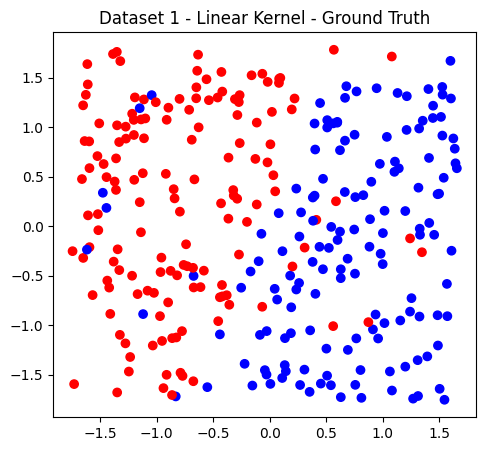

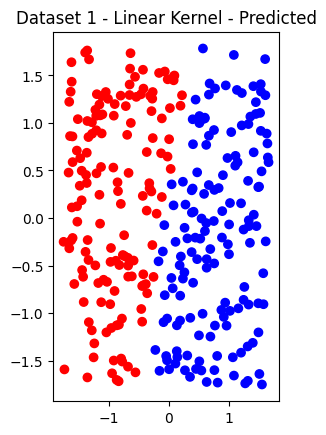

     pcost       dcost       gap    pres   dres
 0: -7.0427e+02 -5.7102e+03  4e+04  4e+00  4e-13
 1: -4.6115e+02 -3.8497e+03  7e+03  5e-01  2e-13
 2: -3.9152e+02 -1.5434e+03  2e+03  1e-01  2e-13
 3: -3.7892e+02 -7.1590e+02  4e+02  2e-02  1e-13
 4: -3.9652e+02 -5.9240e+02  2e+02  7e-03  1e-13
 5: -4.1539e+02 -5.2500e+02  1e+02  3e-03  1e-13
 6: -4.2451e+02 -4.9831e+02  8e+01  2e-03  1e-13
 7: -4.3000e+02 -4.8287e+02  6e+01  1e-03  1e-13
 8: -4.3392e+02 -4.7268e+02  4e+01  9e-04  1e-13
 9: -4.3920e+02 -4.5949e+02  2e+01  3e-04  1e-13
10: -4.4189e+02 -4.5395e+02  1e+01  1e-04  1e-13
11: -4.4411e+02 -4.5000e+02  6e+00  2e-05  2e-13
12: -4.4538e+02 -4.4843e+02  3e+00  8e-06  2e-13
13: -4.4605e+02 -4.4760e+02  2e+00  3e-06  1e-13
14: -4.4647e+02 -4.4712e+02  7e-01  1e-06  1e-13
15: -4.4667e+02 -4.4688e+02  2e-01  1e-07  2e-13
16: -4.4673e+02 -4.4682e+02  8e-02  5e-08  2e-13
17: -4.4676e+02 -4.4678e+02  2e-02  1e-08  1e-13
18: -4.4677e+02 -4.4677e+02  7e-04  2e-10  2e-13
19: -4.4677e+02 -4.46

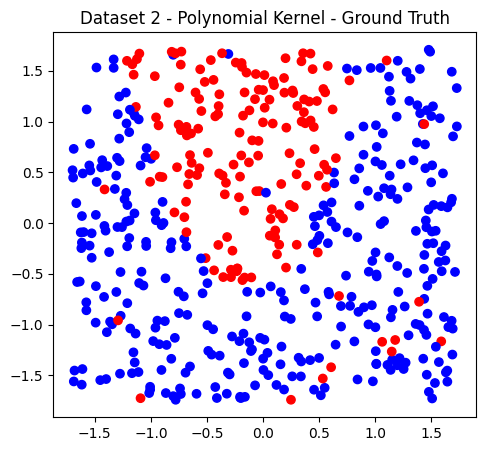

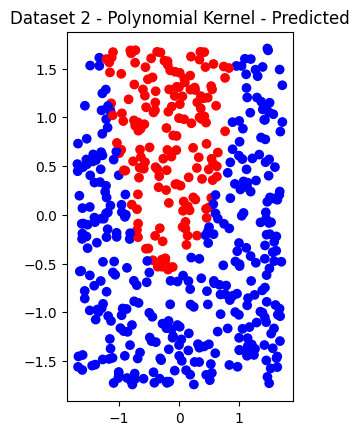

     pcost       dcost       gap    pres   dres
 0: -4.4509e+01 -1.4777e+03  1e+03  6e-15  8e-16
 1: -6.3544e+01 -1.7612e+02  1e+02  7e-15  7e-16
 2: -7.0231e+01 -9.1519e+01  2e+01  1e-15  3e-16
 3: -7.2472e+01 -7.9099e+01  7e+00  6e-15  2e-16
 4: -7.3328e+01 -7.5410e+01  2e+00  5e-15  2e-16
 5: -7.3663e+01 -7.4253e+01  6e-01  8e-15  2e-16
 6: -7.3786e+01 -7.3900e+01  1e-01  1e-14  2e-16
 7: -7.3813e+01 -7.3839e+01  3e-02  4e-15  2e-16
 8: -7.3820e+01 -7.3824e+01  5e-03  7e-15  2e-16
 9: -7.3821e+01 -7.3822e+01  3e-04  4e-15  2e-16
10: -7.3821e+01 -7.3821e+01  6e-06  4e-16  2e-16
Optimal solution found.
372 support vectors out of 1167 points

Classification Report for Dataset 3 - RBF Kernel
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       152
           1       0.99      1.00      1.00       140

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00     

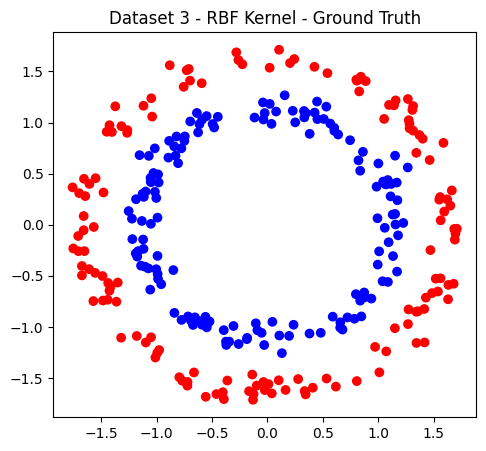

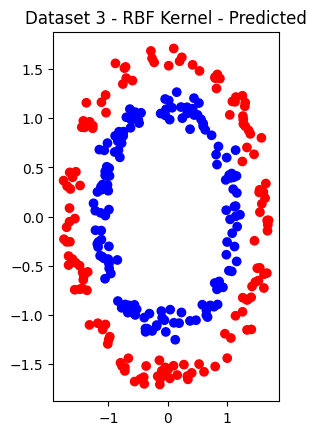

In [85]:
for i, (X_train, y_train, X_test, y_test, kernel, title) in enumerate(datasets, start=1):
    if kernel == polynomial_kernel:
        clf = SVM(kernel=lambda x, y: polynomial_kernel(x, y, p=3), C=1.0)
    elif kernel == gaussian_kernel:
        clf = SVM(kernel=lambda x, y: gaussian_kernel(x, y, sigma=0.1), C=1.0)
    else:
        clf = SVM(kernel=kernel, C=1.0)
        
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print(f"\nClassification Report for {title}")
    print(classification_report(y_test, y_predict))

    # Visualize the data points
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    visualize_data(X_test, y_test, title=f"{title} - Ground Truth")
    plt.subplot(1, 2, 2)
    visualize_data(X_test, y_predict, title=f"{title} - Predicted")
    plt.show()